## Part A: Conceptual Questions


1) What is a Decision Tree and how does it make decisions?
   
A Decision tree works like a flowchart. It asks simple questions (yes/no or condition-based) about the data, and based on the answers, it moves step by step until it reaches a final decision.



2) What does a split criterion mean in a Decision Tree?
   
Split criterion is the method used to decide which feature and value should be used to split the data at each step, so that similar data points go into the same group.

3) Difference between Gini Impurity and Entropy.

Both measure how mixedthe data is in a node.

Gini checks how likely a wrong classification is.

Entropy checks how much uncertainty there is in the data.
    
They do the same but in  different ways.

4) Why do Decision Trees tend to overfit?

Decision Trees can grow very deep and start learning useless and small details in the training data, which makes them perform well on training data but poorly on new data.

5) What role does the max_depth parameter play?

It controls how deep the tree can grow. A smaller depth keeps the model simple and helps prevent overfitting.

## Part B: Data Exploration


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

**Load the dataset and display:
Shape of the dataset
Column names
First 5 rows**



In [2]:
path=r"C:\Users\devav\Downloads\heart.csv"

In [3]:
df=pd.read_csv(path)

In [4]:
df.shape

(1025, 14)

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**Identify:
Target column
Feature columns**

In [7]:
target_col= "target"
feature_col= df.drop(columns=target_col).columns
print(target_col)
print(feature_col)

target
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


**Check and report:
Missing values
Data types**

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## Part C: Data Preprocessing


**Handle missing values (if any)**

No missing values 

**Separate:
Features (X)
Target (y)**

In [10]:
Y=df["target"]
X=df.drop(columns="target")

In [11]:
X.shape,Y.shape

((1025, 13), (1025,))

**Split the dataset:
Training set – 80%
Testing set – 20%
Use random_state=42**


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [14]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((820, 13), (820,), (205, 13), (205,))

## Part D: Model Building


**Create a Decision Tree Classifier with:
criterion='gini'
random_state=42
Train the model on training data.
Predict on the test data.**


In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dtc= DecisionTreeClassifier(criterion="gini", random_state=42)

In [17]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
y_pred=dtc.predict(x_test)

## Part E: Model Evaluation

**Compute:
Accuracy score
Confusion matrix (visit this after evaluation metrics for classification are taught)
Classification report (visit this after evaluation metrics for classification are taught)
Answer:
Which class is predicted better?
Is the model overfitting or underfitting?**


In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
accuracy_score(y_test,y_pred)

0.9853658536585366

In [21]:
confusion_matrix(y_test,y_pred)

array([[102,   0],
       [  3, 100]], dtype=int64)

In [22]:
print(classification_report(y_test,y_pred))
      

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



1) Which class is predicted better?

Both classes are predicted almost equally well

Class 0 has perfect recall (1.00) 

Class 1 has perfect precision (1.00) 

2) Is the model overfitting or underfitting?

Test accuracy is very high (98.5%)

The model is neither underfitting nor clearly overfitting.

It is well-fit and generalizes well to test data.

## Part F: Understanding Tree Depth (Manual Experiment)


**Train three models by changing only max_depth:
Model 1--
2**

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc1=DecisionTreeClassifier(max_depth=2,random_state=42)
dtc1.fit(x_train,y_train)
m1_pred=dtc1.predict(x_test)
m1_pre=dtc1.predict(x_train)

**Model 2--5**


In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc2=DecisionTreeClassifier(max_depth=5,random_state=42)
dtc2.fit(x_train,y_train)
m2_pred=dtc2.predict(x_test)
m2_pre=dtc2.predict(x_train)

**Model 3--
None**


In [25]:
from sklearn.tree import DecisionTreeClassifier
dtc3=DecisionTreeClassifier(max_depth=None,random_state=42)
dtc3.fit(x_train,y_train)
m3_pred=dtc3.predict(x_test)
m3_pre=dtc3.predict(x_train)

**For each model, record:
Training accuracy
Testing accuracy**

In [26]:
m1_train=accuracy_score(y_train,m1_pre)
m2_train=accuracy_score(y_train,m2_pre)
m3_train=accuracy_score(y_train,m3_pre)
print(m1_train,m2_train,m3_train,sep="\n")

0.7695121951219512
0.9292682926829269
1.0


In [27]:
m1_test=accuracy_score(y_test,m1_pred)
m2_test=accuracy_score(y_test,m2_pred)
m3_test=accuracy_score(y_test,m3_pred)
print(m1_test,m2_test,m3_test,sep="\n")

0.6780487804878049
0.8439024390243902
0.9853658536585366


**Answer:
What happens when the tree is very shallow?
What happens when the tree is very deep?
Which model performs best and why?**

1) What happens when the tree is very shallow?

Tree is very shallow, it cannot learn enough patterns from the data.
Both training and testing accuracy remain low, which shows underfitting.
The model is too simple to represent the data properly.

2) What happens when the tree is very deep?

When the tree is very deep, it learns the training data almost perfectly.
Training accuracy becomes 100%, and testing accuracy also becomes very high.
However, deep trees are more likely to overfit, as they can memorize noise in the data.

3) Which model performs best and why?

Model 3 (max_depth = None) performs the best in this case because it achieves the highest testing accuracy (98.5%), meaning it predicts unseen data most accurately.

## Part G: Tree Visualization

**Visualize one Decision Tree (choose the best-performing one).
Include:
Feature names
Class names**

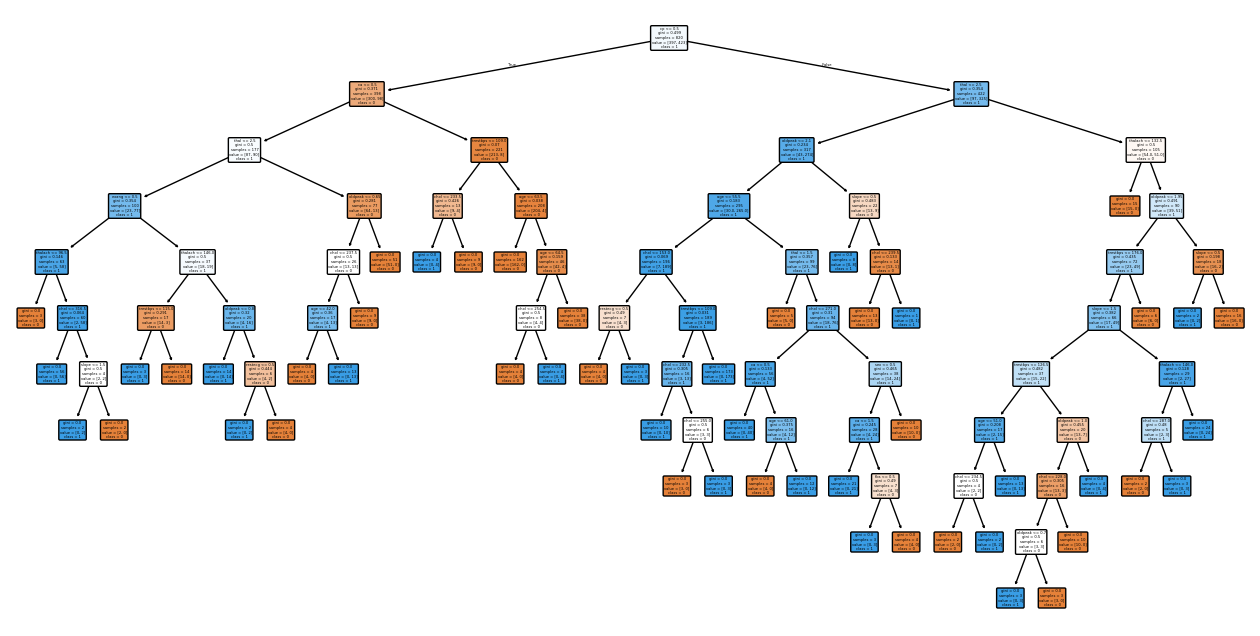

In [30]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

plot_tree(dtc3, feature_names=X.columns,class_names=["0", "1"],filled=True,rounded=True)

plt.show()


## Part H: Reflection Questions

1) Why are Decision Trees suitable for medical datasets?

Decision Trees are suitable for medical datasets because they are simple, transparent, and easy to interpret. Medical decisions often require clear reasoning, and Decision Trees provide step-by-step rules that doctors and healthcare professionals can understand and trust.

2) What makes Decision Trees easy to interpret?

Decision Trees are easy to interpret because they resemble human decision-making. Each internal node represents a clear condition, each branch represents an outcome of that condition, and each leaf node represents a final decision

3) Why are Decision Trees commonly used in ensemble methods?

Decision Trees are commonly used in ensemble methods because:

They are fast to train

They capture non-linear patterns

Different trees can learn different parts of the data